In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

from xmeans import XMeans

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def visualize(data, labels, model):
    fig = plt.figure(figsize=(6,6), dpi=80)
    plt.scatter(data[:, 0], data[:, 1], s=20, c=labels, cmap='viridis')
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=50, c='red')
    plt.grid()
    plt.show()

## 2-dimenisonal cases

No split made. Please check data distribution or reduce K_init if necessary.


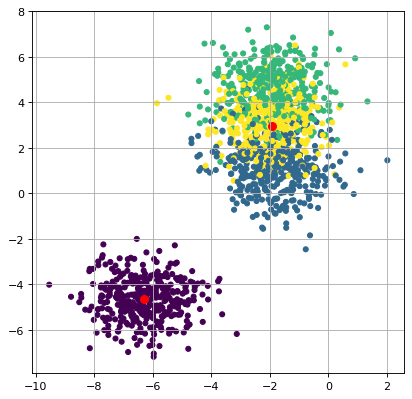

blobs dataset with shape: (1500, 2)
True K                  : 4
Estimated K             : 2
Silhouette score        : 0.732601600001688
Random Index score      : 0.33288829550511795
Completeness score      : 0.9999999999999988
Mutual Information score: 0.5767241456437996


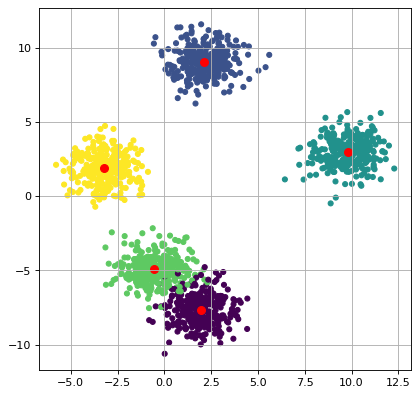

blobs dataset with shape: (1500, 2)
True K                  : 5
Estimated K             : 5
Silhouette score        : 0.6975466622625599
Random Index score      : 0.975559823523967
Completeness score      : 0.970958807844214
Mutual Information score: 0.9708611868290455


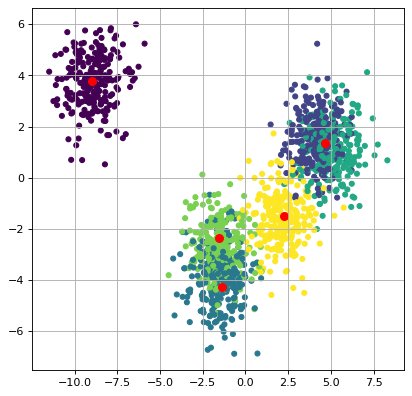

blobs dataset with shape: (1500, 2)
True K                  : 6
Estimated K             : 5
Silhouette score        : 0.5063042057407402
Random Index score      : 0.6447647144192252
Completeness score      : 0.8072017813047606
Mutual Information score: 0.7518504682937535


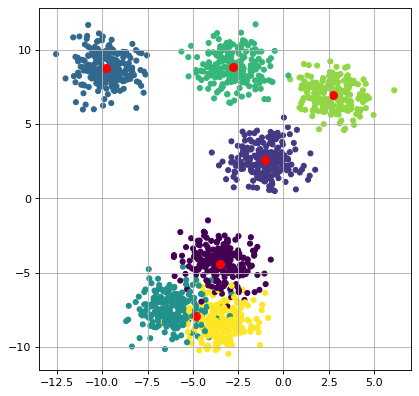

blobs dataset with shape: (1500, 2)
True K                  : 7
Estimated K             : 6
Silhouette score        : 0.5953177238041832
Random Index score      : 0.829117925058119
Completeness score      : 0.9621396114417486
Mutual Information score: 0.9119972794792023


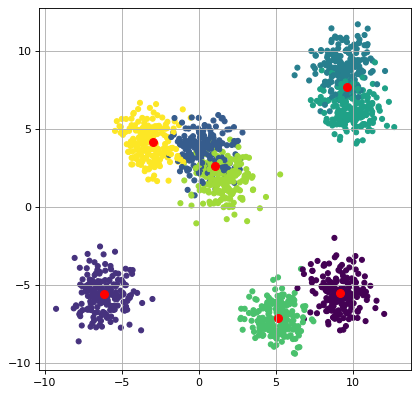

blobs dataset with shape: (1500, 2)
True K                  : 8
Estimated K             : 6
Silhouette score        : 0.6388074950292357
Random Index score      : 0.7403585070378339
Completeness score      : 0.960448680258093
Mutual Information score: 0.8750955724716505


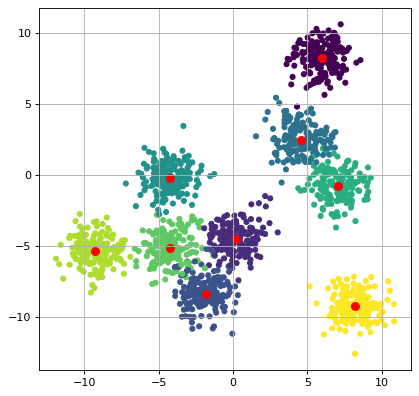

blobs dataset with shape: (1500, 2)
True K                  : 9
Estimated K             : 9
Silhouette score        : 0.6138786193085404
Random Index score      : 0.9591350923958101
Completeness score      : 0.96047663218907
Mutual Information score: 0.9599919914371058


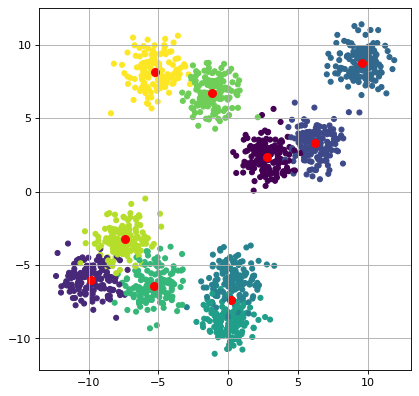

blobs dataset with shape: (1500, 2)
True K                  : 10
Estimated K             : 9
Silhouette score        : 0.571825669406371
Random Index score      : 0.8530929631012845
Completeness score      : 0.9506801635665894
Mutual Information score: 0.9203807856561934


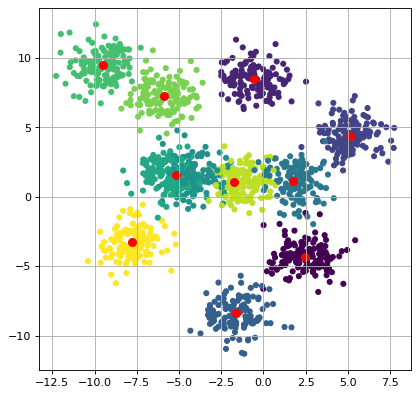

blobs dataset with shape: (1500, 2)
True K                  : 11
Estimated K             : 10
Silhouette score        : 0.5709386323312656
Random Index score      : 0.8484274440823384
Completeness score      : 0.9378677267043605
Mutual Information score: 0.914430198896623


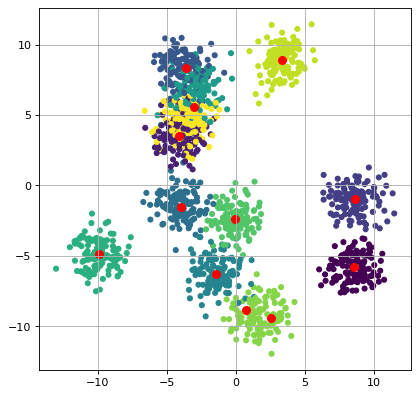

blobs dataset with shape: (1500, 2)
True K                  : 12
Estimated K             : 12
Silhouette score        : 0.5160155377553797
Random Index score      : 0.7764548882673713
Completeness score      : 0.8855797044492731
Mutual Information score: 0.8769791354291215


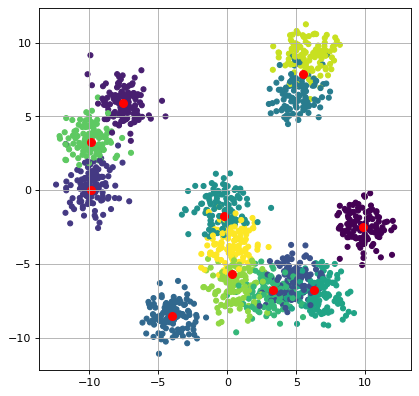

blobs dataset with shape: (1500, 2)
True K                  : 13
Estimated K             : 10
Silhouette score        : 0.5250304260025904
Random Index score      : 0.6886067021110556
Completeness score      : 0.8941997273539732
Mutual Information score: 0.8373771007990184


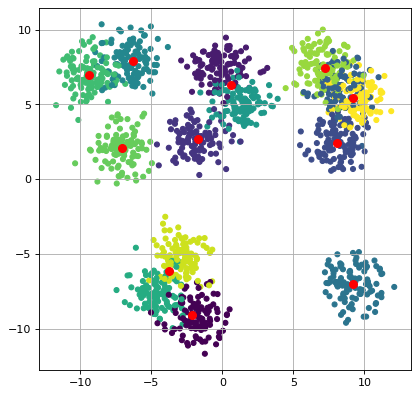

blobs dataset with shape: (1500, 2)
True K                  : 14
Estimated K             : 11
Silhouette score        : 0.48340354627979687
Random Index score      : 0.7033792128204743
Completeness score      : 0.8939877704349778
Mutual Information score: 0.8420787525931255


In [4]:
# blob datasets
for num_centers in range(4, 15):
    data, labels = datasets.make_blobs(n_samples=1500, centers=num_centers, n_features=2, cluster_std=1)
    model = XMeans(K_max=20, identical_spherical_normal_distributions=False).fit(data)
    visualize(data, labels, model)
            
    # reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    print(f'blobs dataset with shape: {data.shape}')
    print(f'True K                  : {num_centers}')
    print(f'Estimated K             : {model.K}')
    print(f'Silhouette score        : {metrics.silhouette_score(data, model.labels)}')
    print(f'Random Index score      : {metrics.adjusted_rand_score(labels, model.labels)}')
    print(f'Completeness score      : {metrics.completeness_score(labels, model.labels)}')
    print(f'Mutual Information score: {metrics.adjusted_mutual_info_score(labels, model.labels)}')

## unnecessary split case

No split made. Please check data distribution or reduce K_init if necessary.


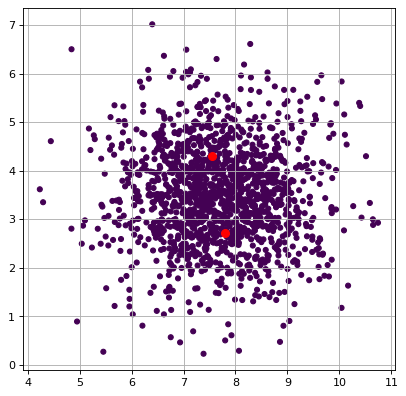

In [5]:
data, labels = datasets.make_blobs(n_samples=1500, centers=1, n_features=2, cluster_std=1)
model = XMeans(K_init=2, identical_spherical_normal_distributions=True).fit(data)
visualize(data, labels, model)

## high dimensional case

No split made. Please check data distribution or reduce K_init if necessary.


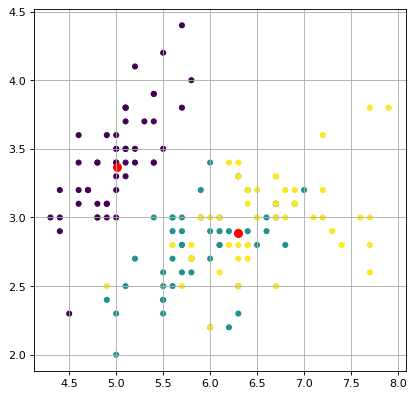

iris dataset with shape : (150, 4)
note that data is in 4 dimension and plot above is only a 2D snapshot
Silhouette score        : 0.681046169211746
Random Index score      : 0.5399218294207123
Completeness score      : 0.8835142349190769
Mutual Information score: 0.6538380713762779


In [6]:
# iris dataset
dataset = datasets.load_iris()
data = dataset.data
labels = dataset.target

model = XMeans(identical_spherical_normal_distributions=False).fit(data)
visualize(data, labels, model)

print(f'iris dataset with shape : {data.shape}')
print(f'note that data is in {data.shape[1]} dimension and plot above is only a 2D snapshot')
print(f'Silhouette score        : {metrics.silhouette_score(data, model.labels)}')
print(f'Random Index score      : {metrics.adjusted_rand_score(labels, model.labels)}')
print(f'Completeness score      : {metrics.completeness_score(labels, model.labels)}')
print(f'Mutual Information score: {metrics.adjusted_mutual_info_score(labels, model.labels)}')